In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './Day2data/'

In [2]:
filePath = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (filePath))
train= pd.read_csv(filePath)

Path of read in data: ./Day2data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

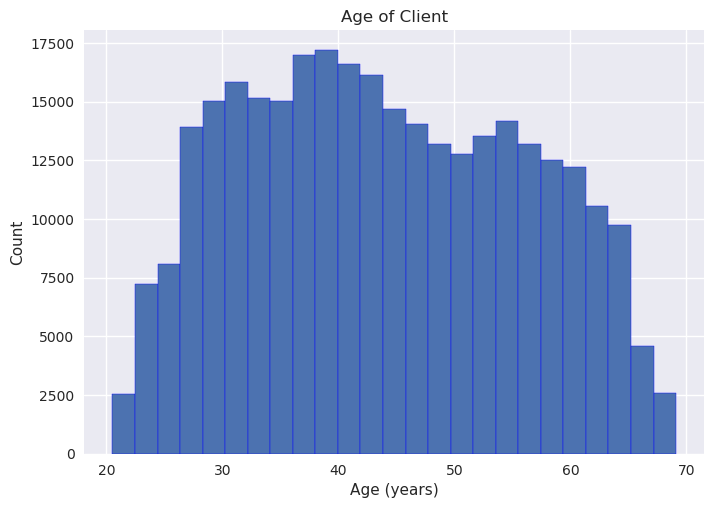

In [23]:
# 以生存年數繪製分布圖
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'b', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.style.use('default')
plt.show()

In [75]:
# # 改變繪圖樣式 (style)
# plt.style.use('ggplot')
# plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
# plt.title('Age of Client')
# plt.xlabel('Age (years)')
# plt.ylabel('Count')
# plt.show()

In [37]:
# # 設定繪圖區域的長與寬
# plt.figure(figsize = (10, 8))

# # Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
# sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# # KDE plot: 不會準時還貸者 - 下圖藍線
# sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')


# # 設定標題與 X, y 軸的說明
# plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# # 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
# plt.show()

In [38]:
# # KDE, 比較不同的 kernel function
# sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
# sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
# sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
# plt.show()

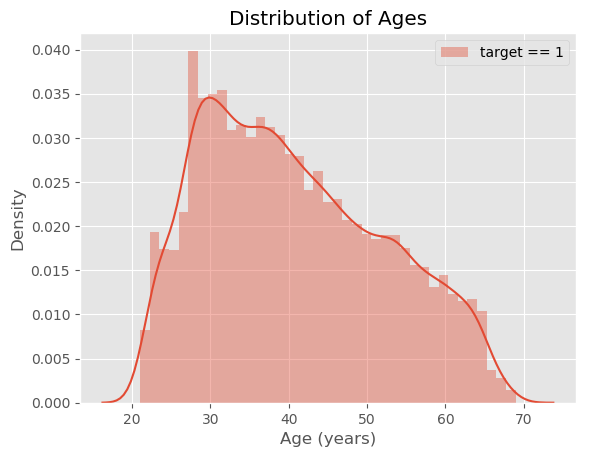

In [76]:
# # 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
# sns.distplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
# plt.legend()
# plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
# plt.show()

In [40]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

In [41]:
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219
5,0,16941,46.413699
6,0,13778,37.747945
7,0,18850,51.643836
8,0,20099,55.065753
9,0,14469,39.641096


In [100]:
bin_cut =  (20,25,30,35,40,45,50,55,60,65,70)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut, labels = False) 

In [101]:
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,1
1,0,16765,45.931507,5
2,0,19046,52.180822,6
3,0,19005,52.068493,6
4,0,19932,54.608219,6
5,0,16941,46.413699,5
6,0,13778,37.747945,3
7,0,18850,51.643836,6
8,0,20099,55.065753,7
9,0,14469,39.641096,3


In [102]:
# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head(10)

3    42868
4    41406
2    39440
5    35135
6    34942
7    33120
1    32862
8    27476
0    12159
9     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,1
1,0,16765,45.931507,5
2,0,19046,52.180822,6
3,0,19005,52.068493,6
4,0,19932,54.608219,6
5,0,16941,46.413699,5
6,0,13778,37.747945,3
7,0,18850,51.643836,6
8,0,20099,55.065753,7
9,0,14469,39.641096,3


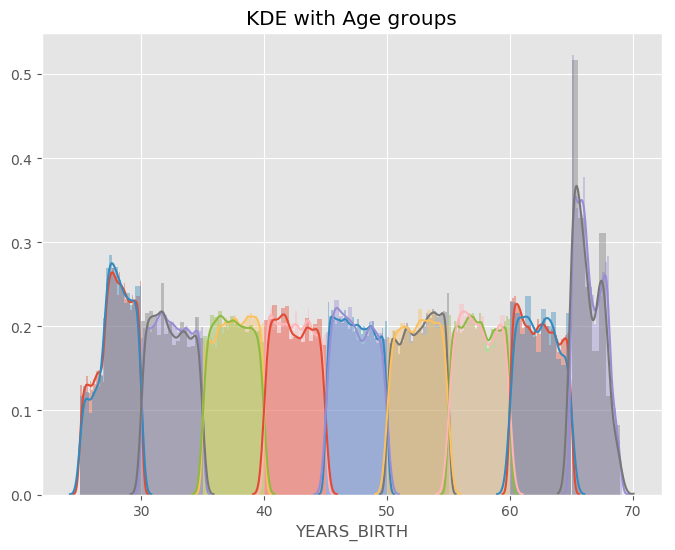

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,1
1,0,16765,45.931507,5
2,0,19046,52.180822,6
3,0,19005,52.068493,6
4,0,19932,54.608219,6


In [104]:
year_group_sorted = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()
age_data.head()

In [105]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
0,0.123036,8532.795625,23.377522
1,0.111436,10155.219250,27.822518
2,0.102814,11854.848377,32.479037
3,0.089414,13707.908253,37.555913
4,0.078491,15497.661233,42.459346
5,0.074171,17323.900441,47.462741
6,0.066968,19196.494791,52.593136
7,0.055314,20984.262742,57.491131
8,0.052737,22780.547460,62.412459


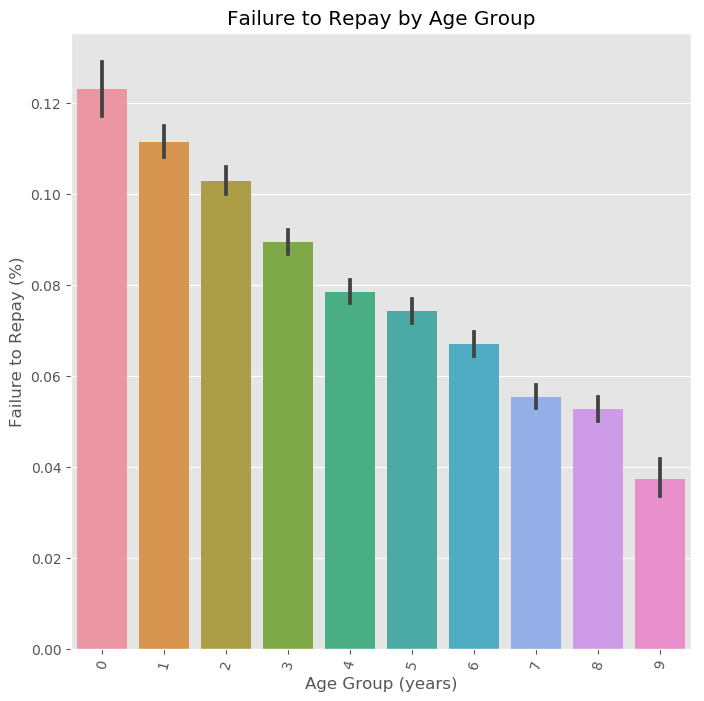

In [106]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');